In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Get_weighted_average(value,error):
    #Factor=2841.438
    Factor=1
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/(Factor**2*error[i]*error[i])
        sum_sigma += 1/(Factor**2*error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_average(value1,error1,value2,error2):
    sum_mean = value1/error1**2+value2/error2**2
    sum_sigma = 1/error1**2+1/error2**2
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_ratio_error(value1,error1,value2,error2):
#    return value1/value2,(value1/value2)*math.sqrt((error1/value1)**2+(error2/value2)**2)
#this is actually same method
#def Get_ratio_error(value1,error1,valuem,errorm):
#    return abs(value1-valuem)/valuem,abs(value1-valuem)/valuem*math.sqrt((error1/value1)**2+(errorm/valuem)**2)
def Get_ratio_error(value1,error1,valuem,errorm):
    return abs(value1-valuem)/value1,abs(value1-valuem)/value1*math.sqrt((error1/value1)**2+(errorm/valuem)**2)

In [3]:

Tra_df_zQ2xbjPhT=pd.read_csv('Materials/results_june2024/Tra_Unpol_RC.txt',delim_whitespace=True,names=["Set","Ebeam","Pol_b","Pol_t","x","y","z","Pt2","phih","phiS","k0_cut","born","amm","nrad_ir","radf","radf_err","nrad","nrad_err","rad","rad_err","tot","tot_err"],header=None)
Tra_df_zQ2xbjPhT.head()

,Set,Ebeam,Pol_b,Pol_t,x,y,z,Pt2,phih,phiS,...,amm,nrad_ir,radf,radf_err,nrad,nrad_err,rad,rad_err,tot,tot_err
0,0,11.0,U,U,0.125,0.48445,0.35,0.1,-2.984513,1.0,...,4.803080e-13,0.000158,5.331388e-08,6.687479e-12,0.000158,6.687479e-12,0.000067,9.033169e-08,0.000225,9.033838e-08
1,0,11.0,U,U,0.125,0.48445,0.35,0.1,-2.670354,1.0,...,4.803080e-13,0.000154,4.127098e-08,5.172943e-12,0.000154,5.172943e-12,0.000065,9.219702e-08,0.000219,9.220219e-08
2,0,11.0,U,U,0.125,0.48445,0.35,0.1,-2.356194,1.0,...,4.803080e-13,0.000147,1.985266e-08,5.586367e-12,0.000147,5.586367e-12,0.000060,7.834967e-08,0.000207,7.835526e-08
3,0,11.0,U,U,0.125,0.48445,0.35,0.1,-2.042035,1.0,...,4.803080e-13,0.000136,-6.503658e-09,5.645592e-12,0.000136,5.645592e-12,0.000054,6.927209e-08,0.000190,6.927774e-08
4,0,11.0,U,U,0.125,0.48445,0.35,0.1,-1.727876,1.0,...,4.803080e-13,0.000124,-3.299650e-08,4.890502e-12,0.000124,4.890502e-12,0.000047,5.092489e-08,0.000171,5.092978e-08


In [4]:
PI = math.pi
Factor=2*PI*0.3894*1e6#convert cross section unite
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[3,4,6,8]
#Q2_cuts=[3,4,5,6,8]
xbj_cuts=[0,0.25]
#xbj_cuts=[0.25,0.4]
#xbj_cuts=[0.4,0.6]
#PhT_cuts = [0,0.2]
PhT_cuts = [0,0.2]
#PhT_cuts = [0.2,0.4]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
#phih_bins =[-PI,-0.8*PI,-0.6*PI,-0.4*PI,-0.15*PI,0,0.15*PI,0.4*PI,0.6*PI,0.8*PI,PI]
phih_bins =[-PI,-0.6*PI,-0.4*PI,-0.2*PI,0,0.2*PI,0.4*PI,0.6*PI,0.8*PI,PI]
#Tra_df_zQ2=Tra_df_zQ2xbjPhT[(Tra_df_zQ2xbjPhT['Ebeam']==8.8)&(Tra_df_zQ2xbjPhT['x']>xbj_cuts[0])&(Tra_df_zQ2xbjPhT['x']<xbj_cuts[1])&(Tra_df_zQ2xbjPhT['pT']>PhT_cuts[0])&(Tra_df_zQ2xbjPhT['pT']<PhT_cuts[1])]
#df_xs_kT6_zQ2=df_xs_kT6_zQ2xbjPhT[(df_xs_kT6_zQ2xbjPhT['Ebeam']==8.8)&(df_xs_kT6_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT6_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT6_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT6_zQ2xbjPhT['pT']<PhT_cuts[1])]
Tra_df_zQ2=Tra_df_zQ2xbjPhT[(Tra_df_zQ2xbjPhT['x']>xbj_cuts[0])&(Tra_df_zQ2xbjPhT['x']<xbj_cuts[1])&(Tra_df_zQ2xbjPhT['Pt2']>PhT_cuts[0])&(Tra_df_zQ2xbjPhT['Pt2']<PhT_cuts[1])]


In [5]:
def Get_x_cuts_from_Q2(Q2l,Q2r):
    #from Q2vs. x phase plots
    if Q2l==1 and Q2r==1.5:
        return [0,0.25]
    elif Q2l==1.5 and Q2r==2:
        return [0,0.25,0.375]
    elif Q2l==2 and Q2r==2.5:
        return [0,0.25,0.375]
    elif Q2l==2.5 and Q2r==3:
        return [0.2,0.25,0.5]
    elif Q2l==3 and Q2r==4:
        return [0.25,0.5,0.7]
    elif Q2l==4 and Q2r==6:
        return [0.25,0.5,0.7]
    elif Q2l==6:
        return [0.25,0.5,0.7]

y value  0.38755964542943155 0.5813394681441474
20 20
0.3 0.4
1 1.5
y value  0.5813394681441474 0.7751192908588631
40 40
0.3 0.4
1.5 2
y value  0.7751192908588631 0.9688991135735789
20 20
0.3 0.4
2 2.5
y value  0.9688991135735789 1.1626789362882948
0 0
0.3 0.4
2.5 3
y value  0.38755964542943155 0.5813394681441474
20 20
0.4 0.5
1 1.5
y value  0.5813394681441474 0.7751192908588631
40 40
0.4 0.5
1.5 2
y value  0.7751192908588631 0.9688991135735789
20 20
0.4 0.5
2 2.5
y value  0.9688991135735789 1.1626789362882948
0 0
0.4 0.5
2.5 3
y value  0.38755964542943155 0.5813394681441474
20 20
0.5 0.6
1 1.5
y value  0.5813394681441474 0.7751192908588631
40 40
0.5 0.6
1.5 2
y value  0.7751192908588631 0.9688991135735789
20 20
0.5 0.6
2 2.5
y value  0.9688991135735789 1.1626789362882948
0 0
0.5 0.6
2.5 3


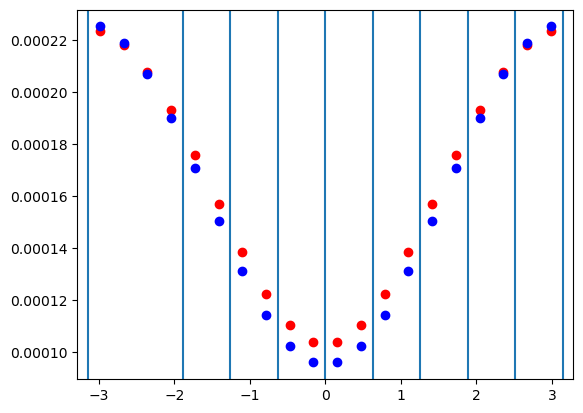

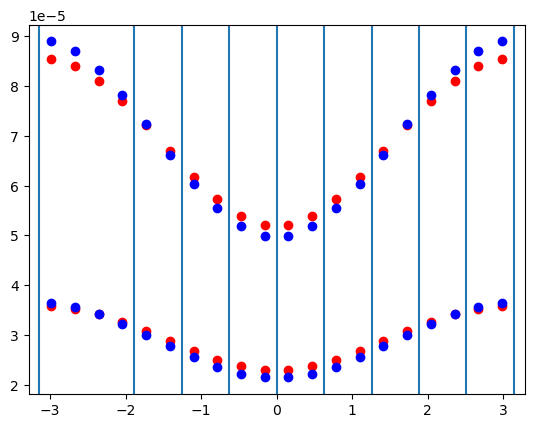

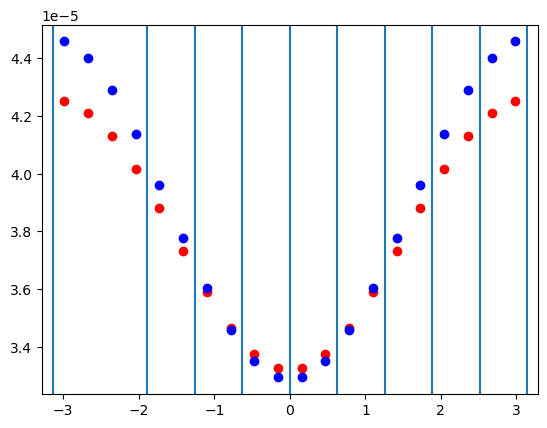

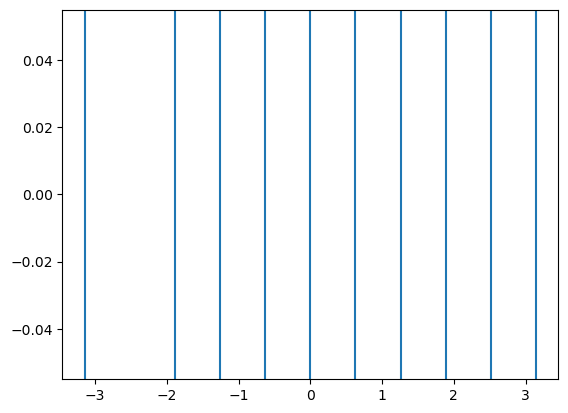

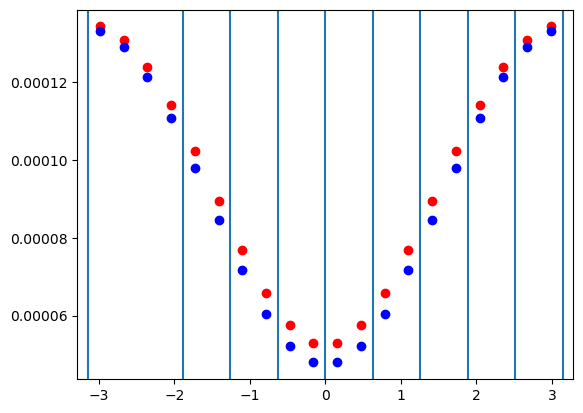

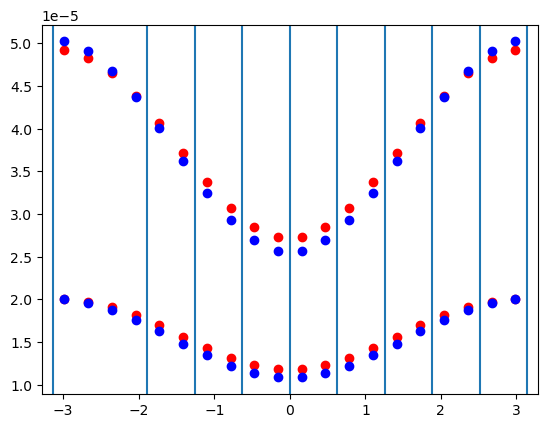

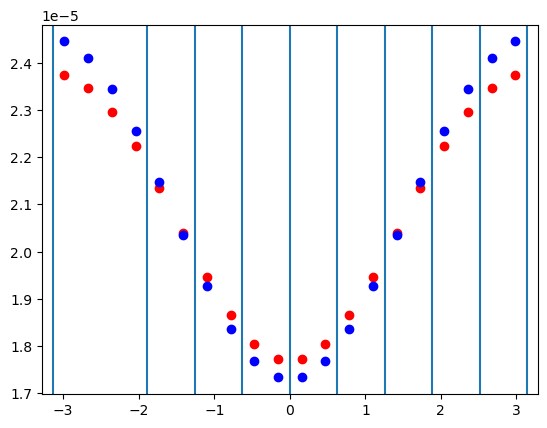

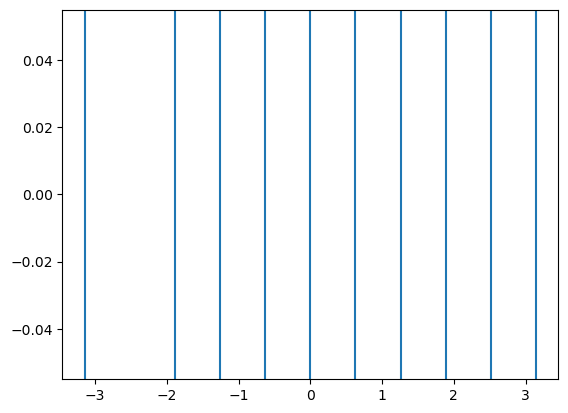

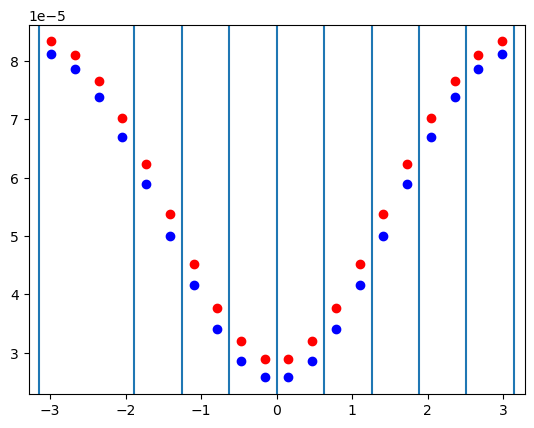

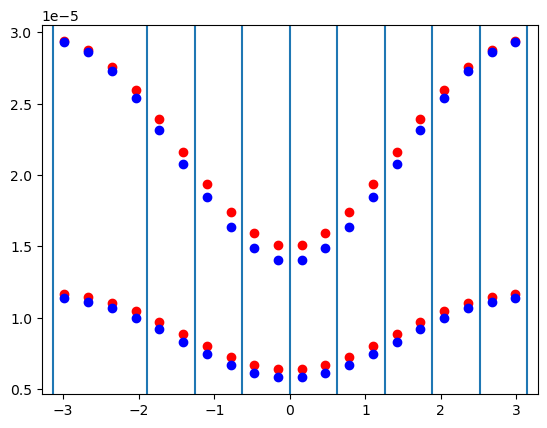

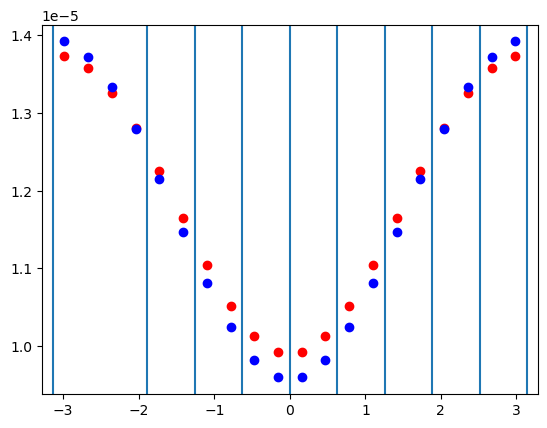

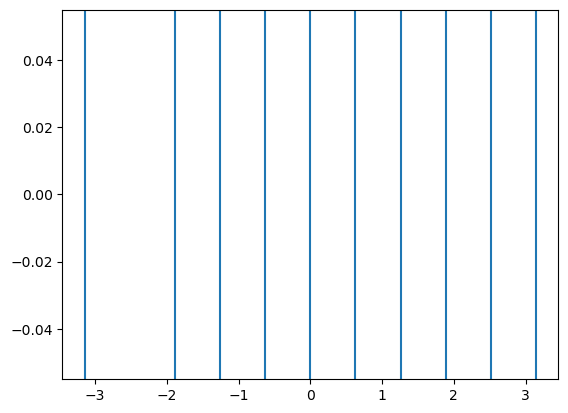

In [6]:
xbj=(xbj_cuts[0]+xbj_cuts[1])/2
s=2*11*0.938272
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
        print('y value ', yl, yr)
        #if Q2_cuts[i_Q2-1]==2.5:
        #    yl=Q2_cuts[i_Q2-1]/s/0.225
        #    yr=Q2_cuts[i_Q2]/s/0.225
        Tra_df=Tra_df_zQ2[(Tra_df_zQ2['z']>z_cuts[i_z-1])&(Tra_df_zQ2['z']<z_cuts[i_z])&(Tra_df_zQ2['y']>yl)&(Tra_df_zQ2['y']<yr)]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = Tra_df['phih'].to_list()
        Fuu_kT8 = Tra_df['born'].to_list()
        phih_kT6 = Tra_df['phih'].to_list()
        Fuu_kT6 = Tra_df['tot'].to_list()
        #print(Tra_df)
        print(len(phih_kT8),len(phih_kT6))
        print(z_cuts[i_z-1],z_cuts[i_z])
        #plt.text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]))
        print(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        plt.plot(phih_kT8,np.asarray(Fuu_kT8),'ro')
        plt.plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        for i_phih in phih_bins:
            plt.axvline(x=i_phih)

[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0.2, 0.25, 0.5] 0.225
20 20
[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0.2, 0.25, 0.5] 0.225
20 20
[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0.2, 0.25, 0.5] 0.225
20 20


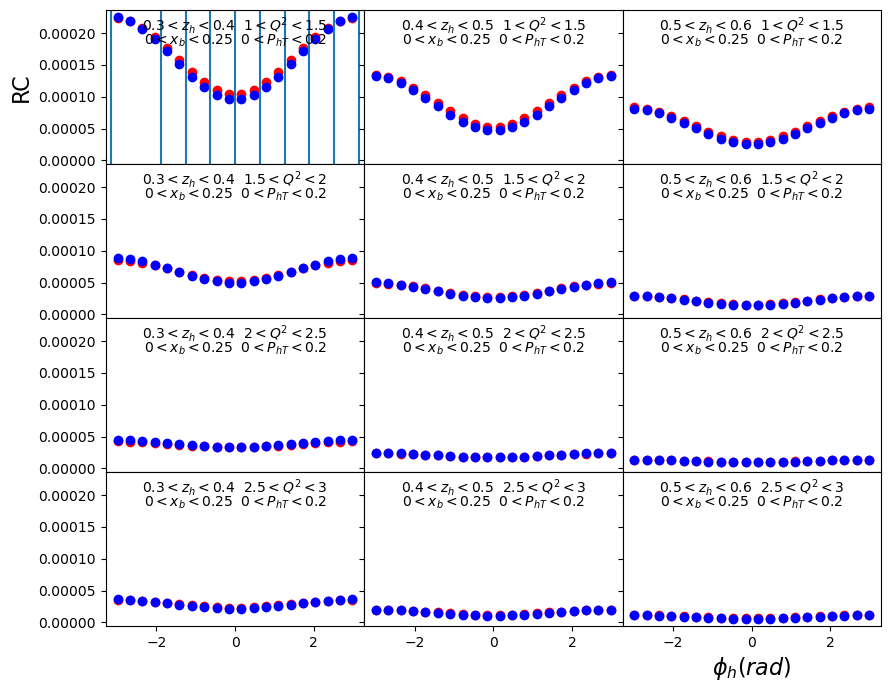

In [7]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)


for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        x_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        xbj=(x_cuts[0]+x_cuts[1])/2
        print(x_cuts,xbj)
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
       
        Tra_df=Tra_df_zQ2[(Tra_df_zQ2['z']>z_cuts[i_z-1])&(Tra_df_zQ2['z']<z_cuts[i_z])&(Tra_df_zQ2['y']>yl)&(Tra_df_zQ2['y']<yr)&(Tra_df_zQ2['x']==xbj)]

        phih_kT8 = Tra_df['phih'].to_list()
        Fuu_kT8 = Tra_df['born'].to_list()
        phih_kT6 = Tra_df['phih'].to_list()
        Fuu_kT6 = Tra_df['tot'].to_list()
        #print(Tra_df)
        print(len(phih_kT8),len(phih_kT6))
        axs[i_Q2-1][i_z-1].plot(phih_kT8,np.asarray(Fuu_kT8),'ro')
        axs[i_Q2-1][i_z-1].plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.12)
        
axs[0][0].set_ylabel('RC',fontsize=16)
for i_phih in phih_bins:
    axs[0][0].axvline(x=i_phih)
#plt.savefig('../Unpol_proposal/Materials/results_sys/RC.pdf')


[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0.2, 0.25, 0.5] 0.225
20 20
[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0.2, 0.25, 0.5] 0.225
20 20
[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0.2, 0.25, 0.5] 0.225
20 20


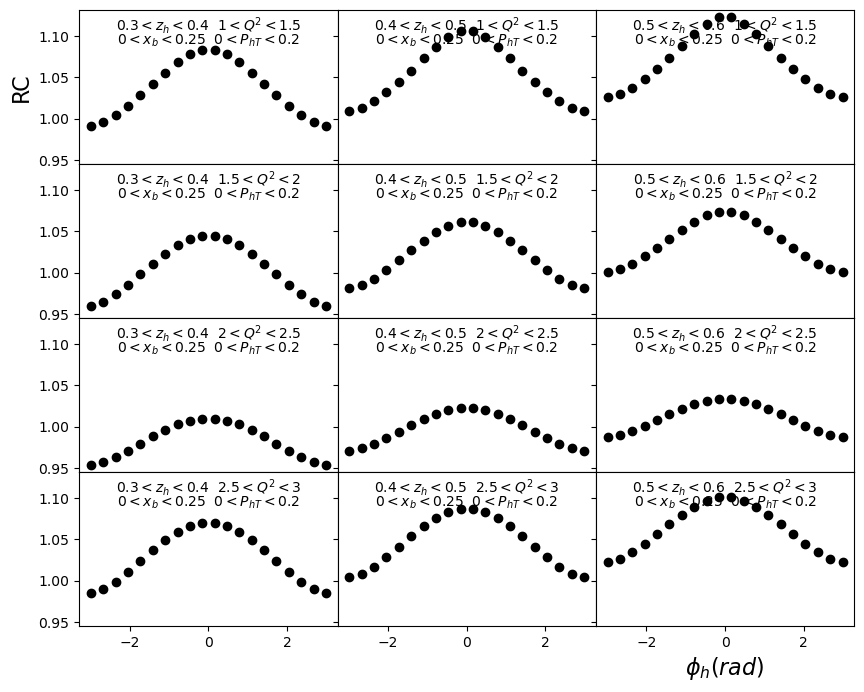

In [8]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)


for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        x_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        xbj=(x_cuts[0]+x_cuts[1])/2
        print(x_cuts,xbj)
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
       
        Tra_df=Tra_df_zQ2[(Tra_df_zQ2['z']>z_cuts[i_z-1])&(Tra_df_zQ2['z']<z_cuts[i_z])&(Tra_df_zQ2['y']>yl)&(Tra_df_zQ2['y']<yr)&(Tra_df_zQ2['x']==xbj)]

        phih_kT8 = Tra_df['phih'].to_list()
        Fuu_kT8 = Tra_df['born'].to_list()
        phih_kT6 = Tra_df['phih'].to_list()
        Fuu_kT6 = Tra_df['tot'].to_list()
        #print(Tra_df)
        print(len(phih_kT8),len(phih_kT6))
        axs[i_Q2-1][i_z-1].plot(phih_kT8,np.asarray(Fuu_kT8)/np.asarray(Fuu_kT6),'ko')
        #axs[i_Q2-1][i_z-1].plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.12)
        
axs[0][0].set_ylabel('RC',fontsize=16)
#for i_phih in phih_bins:
#    axs[0][0].axvline(x=i_phih)
plt.savefig('Materials/results_june2024/Tra_Unpol_RC.pdf')


[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20
[0, 0.25, 0.375] 0.125
20 20


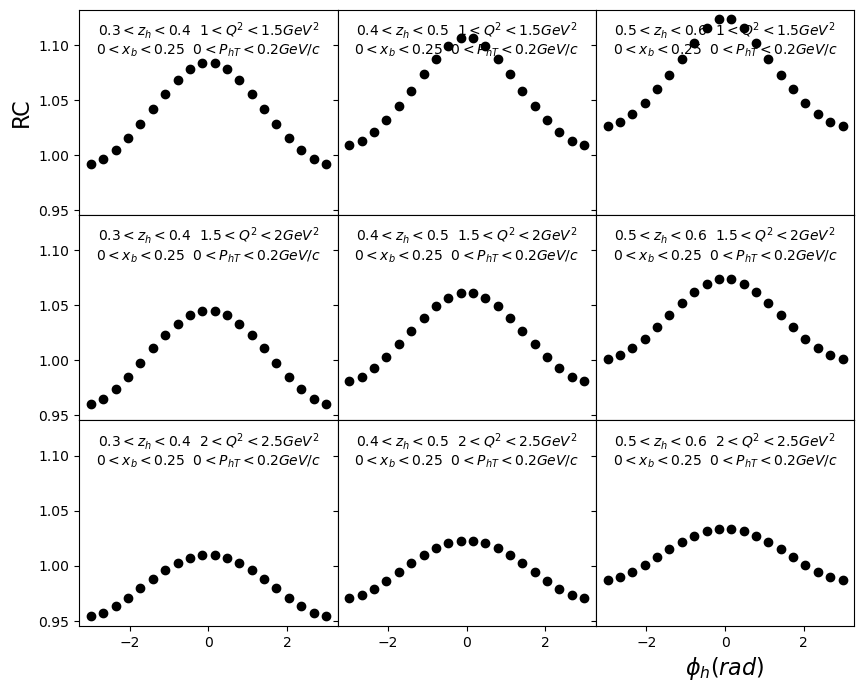

In [9]:
fig, axs = plt.subplots(3,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)
Q2_cuts=[1,1.5,2,2.5]

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        x_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        xbj=(x_cuts[0]+x_cuts[1])/2
        print(x_cuts,xbj)
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
       
        Tra_df=Tra_df_zQ2[(Tra_df_zQ2['z']>z_cuts[i_z-1])&(Tra_df_zQ2['z']<z_cuts[i_z])&(Tra_df_zQ2['y']>yl)&(Tra_df_zQ2['y']<yr)&(Tra_df_zQ2['x']==xbj)]

        phih_kT8 = Tra_df['phih'].to_list()
        Fuu_kT8 = Tra_df['born'].to_list()
        phih_kT6 = Tra_df['phih'].to_list()
        Fuu_kT6 = Tra_df['tot'].to_list()
        #print(Tra_df)
        print(len(phih_kT8),len(phih_kT6))
        axs[i_Q2-1][i_z-1].plot(phih_kT8,np.asarray(Fuu_kT8)/np.asarray(Fuu_kT6),'ko')
        #axs[i_Q2-1][i_z-1].plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{} GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{} GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.12)
        
axs[0][0].set_ylabel('RC',fontsize=16)
#for i_phih in phih_bins:
#    axs[0][0].axvline(x=i_phih)
plt.savefig('Materials/results_june2024/Tra_Unpol_RC_lowQ2.pdf')


[0.2, 0.25, 0.5] 0.225
20 20
[0.2, 0.25, 0.5] 0.225
20 20
[0.2, 0.25, 0.5] 0.225
20 20


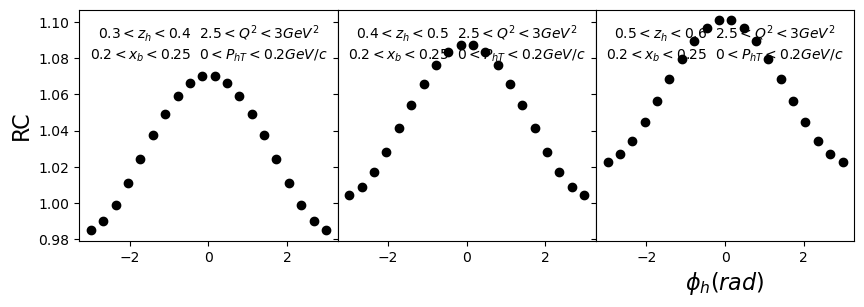

In [10]:
#For Q2 2.5 to 3, due to the kin coverage, we don't have full x coverage
fig, axs = plt.subplots(1,3,figsize=(10,3),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)
Q2_cuts=[2.5,3]
xbj_cuts=[0.2,0.25]
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        x_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        xbj=(x_cuts[0]+x_cuts[1])/2
        print(x_cuts,xbj)
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
       
        Tra_df=Tra_df_zQ2[(Tra_df_zQ2['z']>z_cuts[i_z-1])&(Tra_df_zQ2['z']<z_cuts[i_z])&(Tra_df_zQ2['y']>yl)&(Tra_df_zQ2['y']<yr)&(Tra_df_zQ2['x']==xbj)]

        phih_kT8 = Tra_df['phih'].to_list()
        Fuu_kT8 = Tra_df['born'].to_list()
        phih_kT6 = Tra_df['phih'].to_list()
        Fuu_kT6 = Tra_df['tot'].to_list()
        #print(Tra_df)
        print(len(phih_kT8),len(phih_kT6))
        axs[i_z-1].plot(phih_kT8,np.asarray(Fuu_kT8)/np.asarray(Fuu_kT6),'ko')
        
        axs[i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{} GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_z-1].transAxes)
        axs[i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}GeV/c$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_z-1].transAxes)      
        
        
axs[0].set_ylabel('RC',fontsize=16)
#for i_phih in phih_bins:
#    axs[0][0].axvline(x=i_phih)
plt.savefig('Materials/results_june2024/Tra_Unpol_RC_4Q2.pdf')


In [11]:
#For large Q2,middle x
Q2_cuts=[3,4,6,8]
xbj_cuts=[0.25,0.5]
#xbj_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
Tra_df_zQ2=Tra_df_zQ2xbjPhT[(Tra_df_zQ2xbjPhT['x']>xbj_cuts[0])&(Tra_df_zQ2xbjPhT['x']<xbj_cuts[1])&(Tra_df_zQ2xbjPhT['Pt2']>PhT_cuts[0])&(Tra_df_zQ2xbjPhT['Pt2']<PhT_cuts[1])]


[0.25, 0.5, 0.7] 0.375
20 20
[0.25, 0.5, 0.7] 0.375
20 20
[0.25, 0.5, 0.7] 0.375
20 20
[0.25, 0.5, 0.7] 0.375
20 20
[0.25, 0.5, 0.7] 0.375
20 20
[0.25, 0.5, 0.7] 0.375
20 20
[0.25, 0.5, 0.7] 0.375
20 20
[0.25, 0.5, 0.7] 0.375
20 20
[0.25, 0.5, 0.7] 0.375
20 20


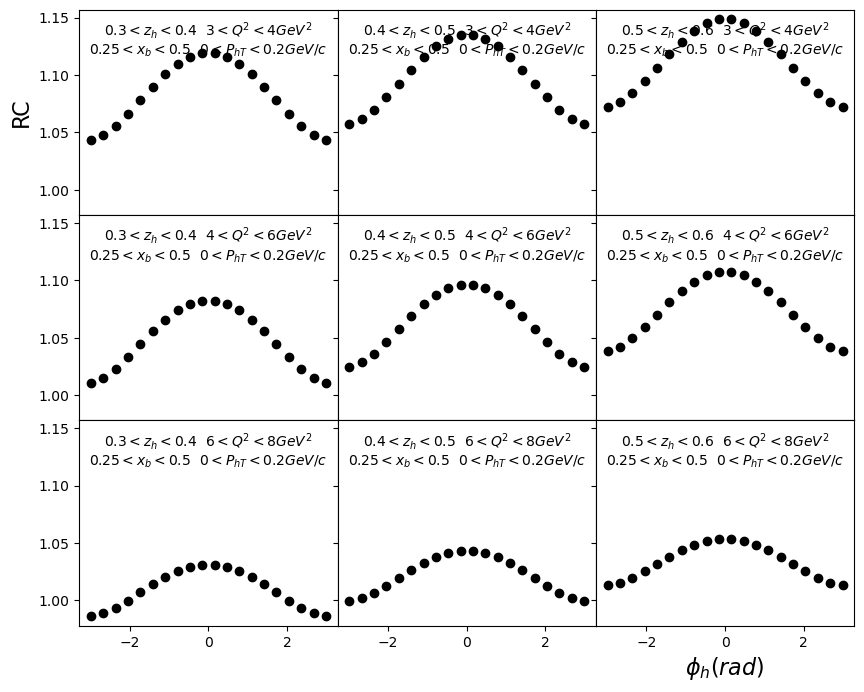

In [12]:
fig, axs = plt.subplots(3,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)


for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        x_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        xbj=(x_cuts[0]+x_cuts[1])/2
        print(x_cuts,xbj)
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
       
        Tra_df=Tra_df_zQ2[(Tra_df_zQ2['z']>z_cuts[i_z-1])&(Tra_df_zQ2['z']<z_cuts[i_z])&(Tra_df_zQ2['y']>yl)&(Tra_df_zQ2['y']<yr)&(Tra_df_zQ2['x']==xbj)]

        phih_kT8 = Tra_df['phih'].to_list()
        Fuu_kT8 = Tra_df['born'].to_list()
        phih_kT6 = Tra_df['phih'].to_list()
        Fuu_kT6 = Tra_df['tot'].to_list()
        #print(Tra_df)
        print(len(phih_kT8),len(phih_kT6))
        axs[i_Q2-1][i_z-1].plot(phih_kT8,np.asarray(Fuu_kT8)/np.asarray(Fuu_kT6),'ko')
        #axs[i_Q2-1][i_z-1].plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{} GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{} GeV/c$'.format(x_cuts[0],x_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.12)
        
axs[0][0].set_ylabel('RC',fontsize=16)
#for i_phih in phih_bins:
#    axs[0][0].axvline(x=i_phih)
plt.savefig('Materials/results_june2024/Tra_Unpol_RC_lQ2.pdf')

In [13]:
#For largest Q2,large x
Q2_cuts=[4,6,8]
xbj_cuts=[0.5,0.7]
#xbj_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
Tra_df_zQ2=Tra_df_zQ2xbjPhT[(Tra_df_zQ2xbjPhT['x']>xbj_cuts[0])&(Tra_df_zQ2xbjPhT['x']<xbj_cuts[1])&(Tra_df_zQ2xbjPhT['Pt2']>PhT_cuts[0])&(Tra_df_zQ2xbjPhT['Pt2']<PhT_cuts[1])]


[0.25, 0.5, 0.7] 0.6
20 20
[0.25, 0.5, 0.7] 0.6
20 20
[0.25, 0.5, 0.7] 0.6
20 20
[0.25, 0.5, 0.7] 0.6
20 20
[0.25, 0.5, 0.7] 0.6
20 20
[0.25, 0.5, 0.7] 0.6
20 20


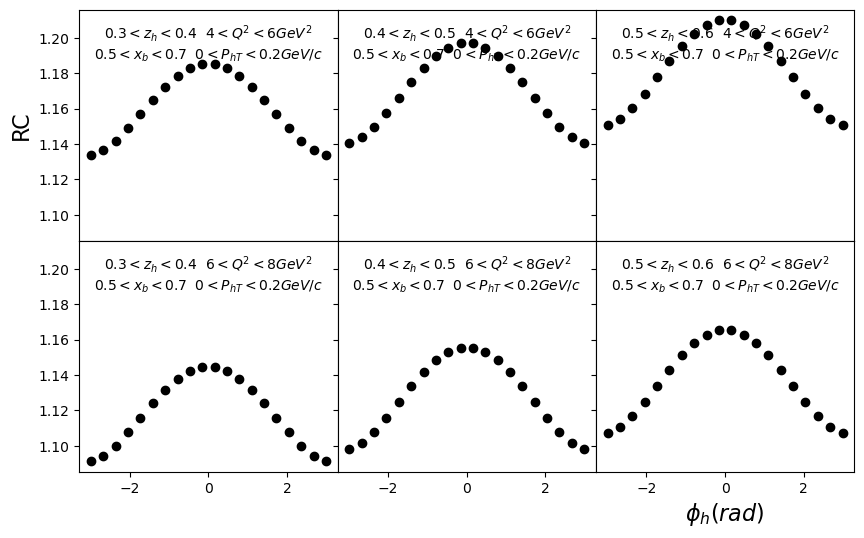

In [14]:
fig, axs = plt.subplots(2,3,figsize=(10,6),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)


for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        x_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        xbj=(x_cuts[1]+x_cuts[2])/2
        print(x_cuts,xbj)
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
       
        Tra_df=Tra_df_zQ2[(Tra_df_zQ2['z']>z_cuts[i_z-1])&(Tra_df_zQ2['z']<z_cuts[i_z])&(Tra_df_zQ2['y']>yl)&(Tra_df_zQ2['y']<yr)&(Tra_df_zQ2['x']==xbj)]

        phih_kT8 = Tra_df['phih'].to_list()
        Fuu_kT8 = Tra_df['born'].to_list()
        phih_kT6 = Tra_df['phih'].to_list()
        Fuu_kT6 = Tra_df['tot'].to_list()
        #print(Tra_df)
        print(len(phih_kT8),len(phih_kT6))
        axs[i_Q2-1][i_z-1].plot(phih_kT8,np.asarray(Fuu_kT8)/np.asarray(Fuu_kT6),'ko')
        #axs[i_Q2-1][i_z-1].plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{} GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{} GeV/c$'.format(x_cuts[1],x_cuts[2],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.12)
        
axs[0][0].set_ylabel('RC',fontsize=16)
#for i_phih in phih_bins:
#    axs[0][0].axvline(x=i_phih)
plt.savefig('Materials/results_june2024/Tra_Unpol_RC_lQ2x.pdf')